In [6]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [7]:
logistic=pd.read_csv('bank-full.csv',sep=';')
logistic.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
X = logistic.iloc[:, :-1]
display(X)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [9]:
y = logistic.iloc[:, -1]
display(y)

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

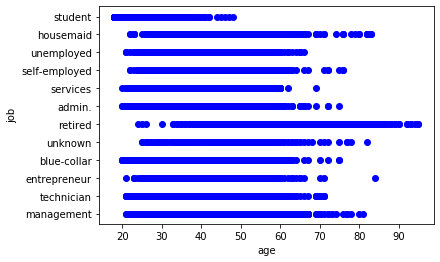

In [10]:
plt.xlabel('age')
plt.ylabel('job')

pltX = logistic.loc[:, 'age']
pltY = logistic.loc[:,'job']
plt.scatter(pltX, pltY, color='blue', label='age')

plt.show()

In [11]:
logistic['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
logistic['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
import seaborn as sns

/Users/emani/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


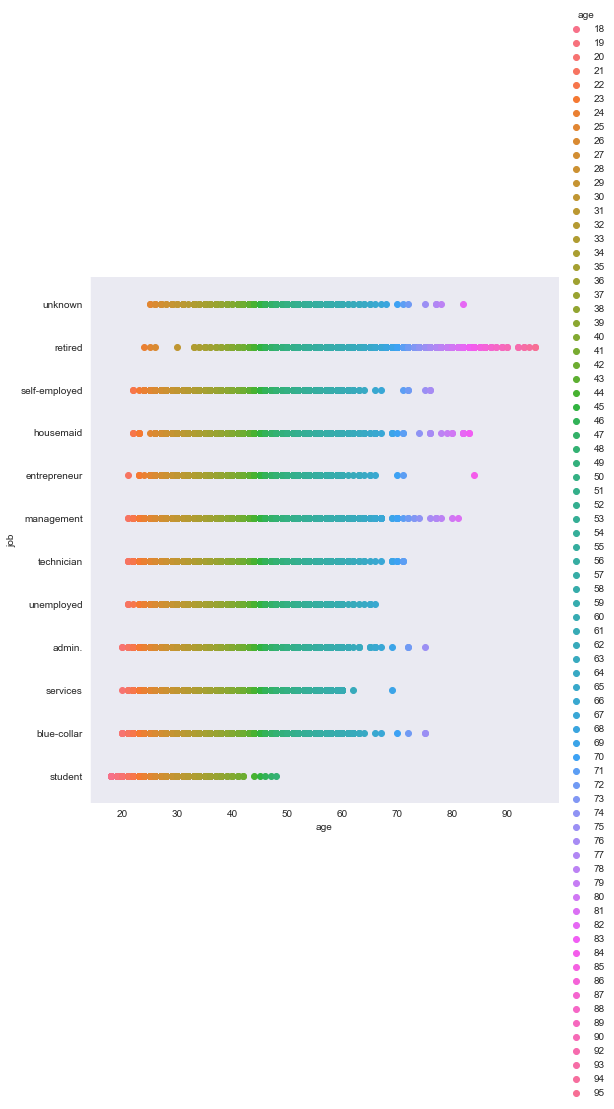

In [14]:
sns.set_style("dark");
sns.FacetGrid(logistic,hue="age",size=8) \
    .map(plt.scatter,"age","job") \
    .add_legend()
plt.show()

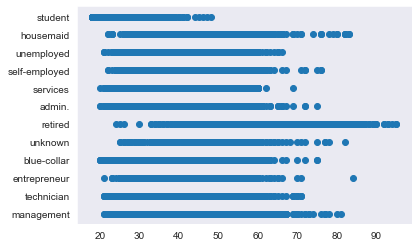

In [15]:
import matplotlib.pyplot as plt
fig = plt.scatter(data=logistic, x='age', y='job')
plt.show()

In [16]:
import plotly.express as px

In [17]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


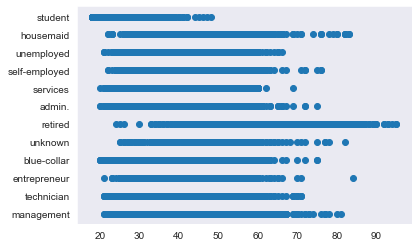

In [18]:
import plotly.express as px
fig = plt.scatter(data=logistic, x='age', y='job')
plt.show()

In [19]:
logistic.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
logistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
logistic['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [27]:
info = logistic.dtypes

In [39]:
cols = info[info == object].index
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(logistic['education'])
le.classes_

array([0, 1, 2, 3])

In [34]:
le.transform(logistic['education'])

array([2, 1, 1, ..., 1, 1, 1])

In [35]:
logistic['education']

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object

In [40]:
for colname in cols:
    le = LabelEncoder()
    logistic[colname] = le.fit_transform(logistic[colname])

logistic.head()    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [41]:
train, test = train_test_split(logistic, test_size=0.2, random_state = 1)

In [43]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
22468,52,4,1,2,0,0,0,0,0,22,1,232,2,-1,0,3,0
6896,50,0,2,1,0,330,1,0,2,28,8,24,1,-1,0,3,0
28408,45,1,1,0,0,300,1,0,0,29,4,203,1,261,3,0,0
8481,38,9,1,1,0,27,1,0,2,3,6,404,4,-1,0,3,0
28753,31,7,2,1,0,887,0,0,0,30,4,427,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,50,9,1,2,0,1830,0,0,0,14,8,318,3,-1,0,3,0
32511,34,4,0,2,0,528,1,0,0,17,0,233,2,-1,0,3,0
5192,48,4,1,2,0,4191,0,0,2,21,8,363,6,-1,0,3,0
12172,45,0,1,3,0,1783,0,0,2,20,6,11,11,-1,0,3,0


In [44]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3610,42,1,1,0,0,2519,1,0,2,15,8,262,4,-1,0,3,0
11677,37,9,1,1,0,2209,0,0,2,20,6,167,2,-1,0,3,0
33018,32,0,1,1,0,923,1,0,0,17,0,819,4,-1,0,3,0
44323,53,1,1,0,0,306,0,0,0,28,5,388,3,181,1,2,1
8119,32,9,2,2,0,257,1,0,2,2,6,183,5,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22959,56,3,1,0,0,0,0,0,0,26,1,102,2,-1,0,3,0
26059,33,7,2,1,0,3910,1,0,0,19,9,676,2,-1,0,3,0
18593,44,11,1,3,0,1317,0,0,1,31,5,444,6,-1,0,3,0
6959,31,4,2,2,0,305,1,0,2,28,8,297,14,-1,0,3,0


In [45]:
train_X = train.drop('y', axis=1)
train_y = train['y']
test_X = test.drop('y', axis=1)
test_y = test['y']

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(train_X, train_y)

/Users/emani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
predictions = model.predict(train_X)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y, predictions)

0.8874972351249724

In [50]:
test_pred = model.predict(test_X)
accuracy_score(test_y, test_pred)

0.8876479044564857